In [1]:
import os
import random
from glob import glob

import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

%matplotlib inline

Using TensorFlow backend.


In [2]:
class_names = ['BANANA', 'RED APPLE', 'PEAR', 'GREEN APPLE']

In [3]:
# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []
raw_frames_type_3 = []
raw_frames_type_4 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')
    elif key & 0xFF == ord("3"):
        # save the frame
        raw_frames_type_3.append(frame)
        print('3 key pressed - Saved TYPE_3 frame')
    elif key & 0xFF == ord("4"):
        # save the frame
        raw_frames_type_4.append(frame)
        print('4 key pressed - Saved TYPE_4 frame')

camera.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [4]:
save_width = 399
save_height = 399

In [5]:
for i in range(1, 5):
    name = './data/images_type_{}'.format(i)
    os.makedirs(name, exist_ok=True)

In [6]:
for i, frame in enumerate(raw_frames_type_1):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_3):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_3/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_4):
    roi = frame[75+2:425-2, 300+2:650-2]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    roi = cv2.resize(roi, (save_width, save_height))
    cv2.imwrite('./data/images_type_4/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [7]:
width = 96
height = 96

In [8]:
import os
import random
from glob import glob
from keras import preprocessing

In [21]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.jpg')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [22]:
images_type_1 = load_images('C:/Users/user/Downloads/ml/images_type_1')
images_type_2 = load_images('C:/Users/user/Downloads/ml/images_type_2')
images_type_3 = load_images('C:/Users/user/Downloads/ml/images_type_3')

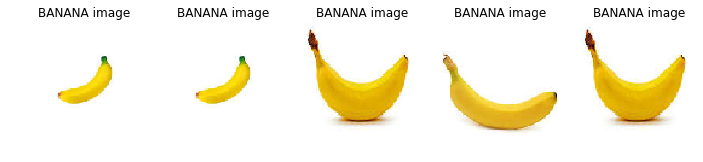

In [23]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

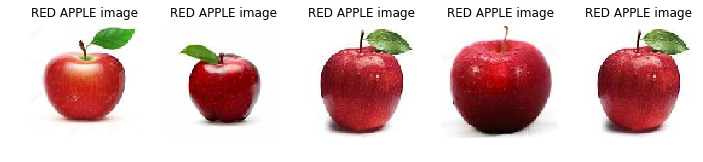

In [24]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

In [25]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)
X_type_3 = np.array(images_type_3)

print(X_type_1.shape)
print(X_type_2.shape)
print(X_type_3.shape)

(6, 96, 96, 3)
(6, 96, 96, 3)
(4, 96, 96, 3)


In [29]:
# one big array containing ALL the images:
X = np.concatenate((X_type_1, X_type_2, X_type_3), axis=0)

In [30]:
X = X / 255.

X.shape

(16, 96, 96, 3)

In [31]:
from keras.utils import to_categorical

y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]
y_type_3 = [2 for item in enumerate(X_type_3)]

y = np.concatenate((y_type_1, y_type_2, y_type_3), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(16, 4)


In [32]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [33]:
import numpy as np
np.random.seed(1) # for reproducibility

# model with base parameters
model = build_model()

model.summary()

W0205 15:09:46.952594  7620 deprecation.py:506] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [34]:
epochs = 20

In [35]:
model.fit(X, y, epochs=epochs)

Epoch 1/20
16/16 [==============================] - 1s 80ms/step - loss: 1.5240 - acc: 0.0625
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 2.7342 - acc: 0.5625
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 6.3170 - acc: 0.1875
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 8.1043 - acc: 0.3750
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 2.2837 - acc: 0.5000
Epoch 6/20
16/16 [==============================] - 0s 30ms/step - loss: 4.7729 - acc: 0.3750
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 3.6071 - acc: 0.4375
Epoch 8/20
16/16 [==============================] - 0s 29ms/step - loss: 4.1731 - acc: 0.2500
Epoch 9/20
16/16 [==============================] - 0s 29ms/step - loss: 1.5769 - acc: 0.3750
Epoch 10/20
16/16 [==============================] - 1s 31ms/step - loss: 0.7903 - acc: 0.6250
Epoch 11/20
16/16 [==============================] - 0s 28m

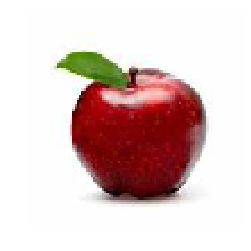

The type predicted is: RED APPLE


In [44]:
type_2 = preprocessing.image.load_img('C:/Users/user/Downloads/ml/images_type_2/2.jpg',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.axis("off")
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

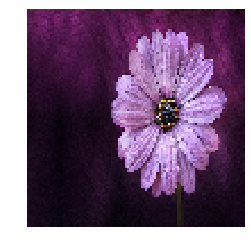

The type predicted is: BANANA


In [45]:
type_2 = preprocessing.image.load_img('C:/Users/user/Downloads/bloom-blooming-blossom-36753.jpg',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.axis("off")
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [46]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred, type_3_pred, type_4_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
    # add text
    tipe_3_text = '{}: {}%'.format(class_names[2], int(type_3_pred*100))
    cv2.putText(frame, tipe_3_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_4_text = '{}: {}%'.format(class_names[3], int(type_4_pred*100))
    cv2.putText(frame, tipe_4_text, (70, 260), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)             0         
__________

In [48]:
model.save('fruit_cnn_model.h5')